# Salary Prediction End-to-End Machine Learning Project

#### 1. Read Data Set
#### 2. Removing outliers
#### 3. Feature Engineering
#### 4. Create and Save Model
#### 5. Create and Deploy Web App using Flask

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('salary.csv')

df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [4]:
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [7]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Removing outliers from hours_per_week

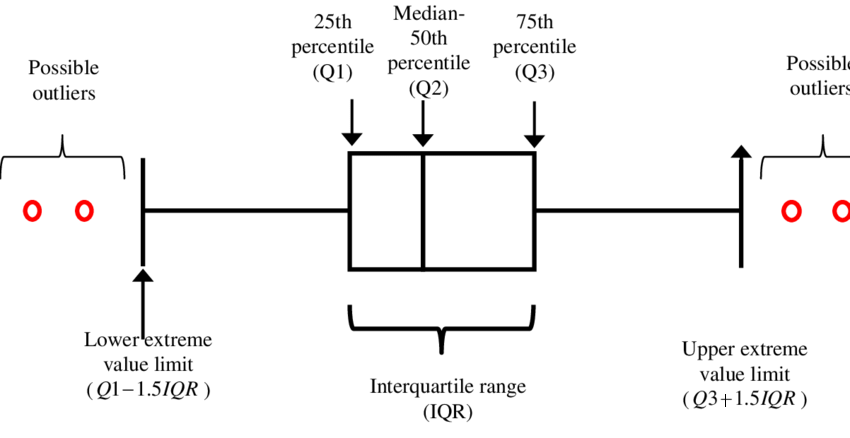

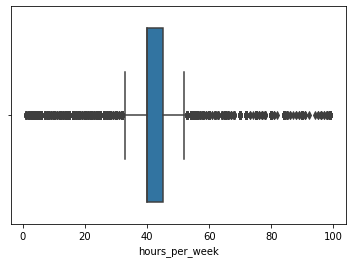

In [9]:
sns.boxplot(df['hours_per_week'])

In [10]:
def remove_outlier_hours_per_week(df):
    IQR = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    
    lower_range = df['hours_per_week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours_per_week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

In [11]:
remove_outlier_hours_per_week(df)

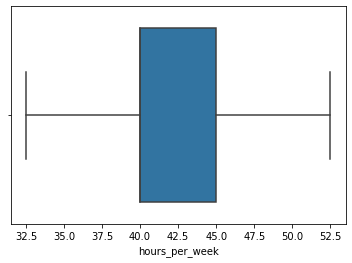

In [12]:
sns.boxplot(df['hours_per_week'])

## Removing outliers from education_num

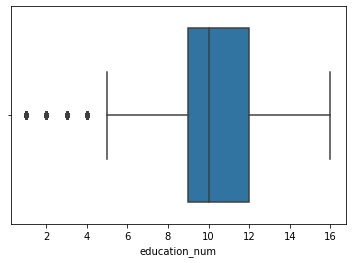

In [13]:
sns.boxplot(df['education_num'])

In [14]:
def remove_outlier_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

In [15]:
remove_outlier_education_num(df)

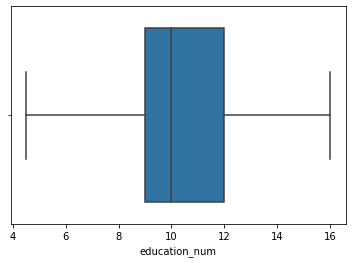

In [16]:
sns.boxplot(df['education_num'])

## Removing outliers from captial_loss

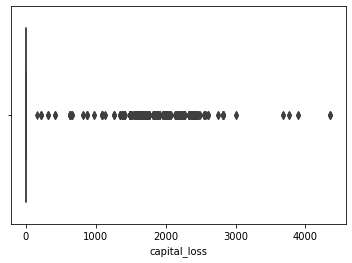

In [17]:
sns.boxplot(df['capital_loss'])

In [18]:
def remove_outlier_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [19]:
remove_outlier_capital_loss(df)

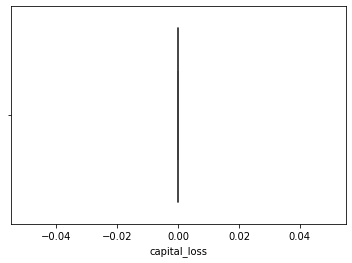

In [20]:
sns.boxplot(df['capital_loss'])

# Corelation between attrubutes

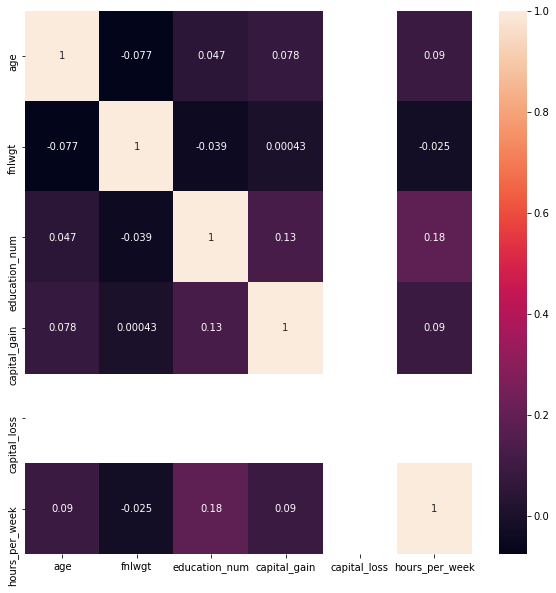

In [21]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [23]:
df = df.drop('fnlwgt', axis=1)

KeyError: "['fnlwgt'] not found in axis"

In [24]:
df.head()

age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc   Bachelors           13.0   Married-civ-spouse   
2   38            Private     HS-grad            9.0             Divorced   
3   53            Private        11th            7.0   Married-civ-spouse   
4   28            Private   Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country  salary  
0           0.0            40.0   United-States   <=50K  
1           0.0            32.5   United-States   <=50K  
2           0.0            40.0   United-States   <=50K  
3           0.0            40.0   United-States   <=50K  
4           0.0            40.0            Cuba   <=50K

## Feature Engineering

In [25]:
def feature_engineering(df):
    
    ## convert the sex column into 0 and 1, if male then 1 else 0
    df['sex'] = np.where(df['sex'] == " Male", 1, 0)
     
    ## do the label encoding in race column (0: 'White',1: 'Black',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other')
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)
    
    ## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
    label_enco_relation = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_relation)
    
    ## {0: ' Adm-clerical',1: ' Exec-managerial',2: ' Handlers-cleaners',3: ' Prof-specialty',4: ' Other-service',5: ' Sales', 6: ' Craft-repair',7: ' Transport-moving',8: ' Farming-fishing',9: ' Machine-op-inspct', 10: ' Tech-support', 11: ' ?',12: ' Protective-serv',13: ' Armed-Forces', 14: ' Priv-house-serv'}
    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    label_enco_occu = {value: key for key, value in enumerate(df['occupation'].unique())}
    ## Replacing ? value with 'Missing'
    df['occupation'] = df['occupation'].map(label_enco_occu)
    
    ## {0: ' Never-married',1: ' Married-civ-spouse',2: ' Divorced',3: ' Married-spouse-absent',4: ' Separated',5: ' Married-AF-spouse',6: ' Widowed'}
    label_enco_marital_status = {value: key for key, value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_marital_status)
    
    label_enco_edu = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(label_enco_edu)
    
    ## {0: ' State-gov', 1: ' Self-emp-not-inc',2: ' Private',3: ' Federal-gov',4: ' Local-gov',5: ' ?',6: ' Self-emp-inc',7: ' Without-pay',8: ' Never-worked'}
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_workclass)
    
    ## {' United-States': 0,' Cuba': 1,' Jamaica': 2,' India': 3,' ?': 4,' Mexico': 5,' South': 6,' Puerto-Rico': 7,' Honduras': 8,' England': 9,' Canada': 10,' Germany': 11,' Iran': 12,' Philippines': 13,' Italy': 14,' Poland': 15,' Columbia': 16,' Cambodia': 17,' Thailand': 18,' Ecuador': 19,' Laos': 20,' Taiwan': 21,' Haiti': 22,' Portugal': 23,' Dominican-Republic': 24,' El-Salvador': 25,' France': 26,' Guatemala': 27,' China': 28,' Japan': 29,' Yugoslavia': 30,' Peru': 31,' Outlying-US(Guam-USVI-etc)': 32,' Scotland': 33,' Trinadad&Tobago': 34,' Greece': 35,' Nicaragua': 36,' Vietnam': 37,' Hong': 38,' Ireland': 39,' Hungary': 40,' Holand-Netherlands': 41
    df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
    label_enco_workclass = {value: key for key, value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_workclass)
    return df

In [26]:
df = feature_engineering(df)

## After doing feature Engineering

In [27]:
df.head()

age  workclass  education  education_num  marital_status  occupation  \
0   39          0          0           13.0               0           0   
1   50          1          0           13.0               1           1   
2   38          2          1            9.0               2           2   
3   53          2          2            7.0               1           2   
4   28          2          0           13.0               1           3   

   relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0             0     0    1          2174           0.0            40.0   
1             1     0    1             0           0.0            32.5   
2             0     0    1             0           0.0            40.0   
3             1     1    1             0           0.0            40.0   
4             2     1    0             0           0.0            40.0   

   native_country  salary  
0               0   <=50K  
1               0   <=50K  
2               0   <=50K  
3               0   <=50K  
4               1   <=50K

## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']]

In [31]:
y = df['salary']

In [32]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [33]:
X = sc.fit_transform(X)

## train_test_split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 13)
Test data shape: (6513, 13)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lg_model = LogisticRegression()

In [39]:
lg_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = lg_model.predict(X_test)

In [41]:
result = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [42]:
pd.DataFrame(result)

Actual Predicted
14160   <=50K     <=50K
27048   <=50K     <=50K
28868    >50K     <=50K
5667    <=50K     <=50K
7827    <=50K     <=50K
...       ...       ...
1338    <=50K     <=50K
24534    >50K     <=50K
18080    >50K      >50K
10354   <=50K     <=50K
24639   <=50K     <=50K

[6513 rows x 2 columns]

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)), "\n")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)), "\n")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)), "\n")

Accuracy Score: 0.8243512974051896 

Confusion Matrix:
 [[4665  277]
 [ 867  704]] 

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4942
        >50K       0.72      0.45      0.55      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513
 



In [46]:
import pickle
# open a file, where you want to store the data
file = open('lg_model.pkl', 'wb')

# dump information to that file
pickle.dump(lg_model, file)